# Lecture 16: Clustering

### Clustering using scikit-learn (with pandas)

Clustering Algorithms covered:
1. k-Means CLustering

Notebook created by Jennifer Widom, modified by Lisa Wang.

In [1]:
import csv
import pandas as pd
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read Cities.csv into dataframe, add column for temperature category
# Note: For a dataframe D and integer i, D.ix[i] is the i-th row of D
f = open('Cities.csv','rU')
cities = pd.read_csv(f)
print cities.iloc[0]

city           Aalborg
country        Denmark
latitude         57.03
longitude         9.92
temperature       7.52
Name: 0, dtype: object


### <font color="green">Clustering using K-means</font>

cluster_centers_ : array, [n_clusters, n_features]
    
Coordinates of cluster centers


labels_ : :
        
Labels of each point


inertia_ : float
    
Sum of squared distances of samples to their closest cluster center.

[5 0 7 4 3 3 2 2 6 3 0 4 8 1 8 2 9 3 1 9 3 6 2 4 0 1 2 5 1 1 2 9 3 0 0 5 6
 2 3 9 0 0 3 8 1 2 0 1 1 2 8 1 8 3 8 1 1 0 0 3 6 2 9 9 9 9 8 0 6 8 7 1 8 2
 0 0 0 8 6 1 2 4 4 8 0 6 2 2 0 4 2 2 0 5 3 1 2 2 1 2 7 9 7 3 2 2 0 8 8 4 2
 7 4 9 1 9 7 7 1 1 9 9 0 2 3 1 3 6 1 2 3 2 9 4 5 8 3 2 9 6 2 2 9 2 2 3 2 8
 1 5 4 9 5 1 7 3 6 8 3 6 6 9 8 8 6 1 1 2 7 6 9 6 5 8 3 2 4 3 6 8 4 4 8 6 8
 5 7 9 0 1 7 7 4 7 8 3 4 6 8 5 7 7 3 1 3 7 1 1 9 3 9 8 2]


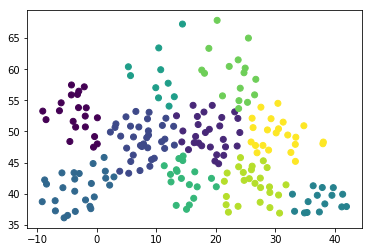

In [5]:
# K-means clustering based on longitude-latitude
kmeans = cluster.KMeans(10)#k 개수
kmeans.fit(cities[['longitude', 'latitude']])# fit(Xarry or matrix)
labels = kmeans.labels_ #cluster number return
plt.scatter(cities['longitude'], cities['latitude'], c=labels)#c = color
plt.show()
# Try different values for K

### 센터 찍기

[[ 32.30148936  43.18617021]
 [  8.58088889  50.63777778]
 [ -3.04826087  46.01695652]
 [ 18.32272727  44.14613636]
 [ 22.72387097  56.44580645]]


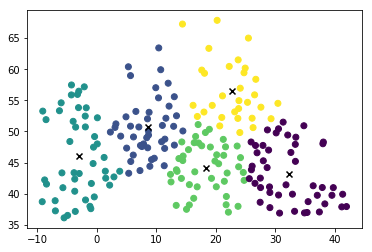

[[ 32.30148936  43.18617021]
 [  8.58088889  50.63777778]
 [ -3.04826087  46.01695652]
 [ 18.32272727  44.14613636]
 [ 22.72387097  56.44580645]]


In [9]:
# Now with centroids
kmeans = cluster.KMeans(5)#5개 clust로 나눠봄
kmeans.fit(cities[['longitude', 'latitude']])
labels = kmeans.labels_
# labels has label of each point 센터
centroids = kmeans.cluster_centers_
print centroids
# centroids is an array[No. of clusters, No. of features]
# In our case, No. of clusters = 5, No. of features = 2(longitude -> x-axis and latitude -> y-axis)
plt.scatter(cities['longitude'], cities['latitude'], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black')#:는 값 모두. [모두,0]
plt.show()
print centroids

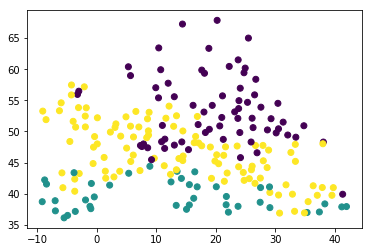

[[  5.87705882]
 [ 15.14439024]
 [  9.63923077]]


In [11]:
# K-means clustering based on temperature
kmeans = cluster.KMeans(3)
kmeans.fit(cities[['temperature']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(cities['longitude'], cities['latitude'], c=labels)
plt.show()
print centroids